In [38]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
from scipy import stats
from sklearn import datasets
from sklearn.cluster import KMeans



# Load the iris dataset

In [39]:
#iris= datasets.load_iris()
#iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     #columns= iris['feature_names'] + ['target'])
iris_df=pd.read_csv('Downloads/Iris.csv')


In [40]:
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# As it is difficult to visulalise 4D dimension vector space we will try to reduce the dimension to 2D using PCA analysis

In [41]:
data = iris_df.iloc[:, 1:5]

from sklearn.decomposition import PCA

model= PCA(n_components=2)
pca= model.fit_transform(data)

data['PCA 1']= pca[:,0]
data['PCA 2'] =pca[:,1]

# visualise the reduced data 

Text(0, 0.5, 'PCA 2')

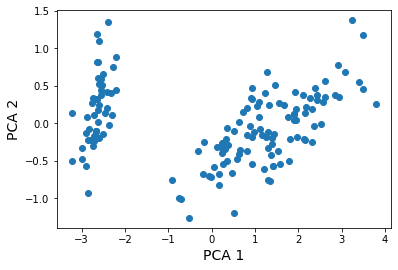

In [42]:
plt.scatter(data['PCA 1'],data['PCA 2'],cmap='jet')

plt.xlabel('PCA 1', fontsize=14)
plt.ylabel('PCA 2', fontsize=14)


# Using KMeans to find the cluster **assumed below as k=3**

In [62]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data)
print(y_predicted)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# predicting the cluster points

In [55]:
data['cluster'] = y_predicted





# Predicting the cluster using elbow method

In [56]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,PCA 1,PCA 2,cluster
0,5.1,3.5,1.4,0.2,-2.684207,0.326607,1
1,4.9,3.0,1.4,0.2,-2.715391,-0.169557,1
2,4.7,3.2,1.3,0.2,-2.889820,-0.137346,1
3,4.6,3.1,1.5,0.2,-2.746437,-0.311124,1
4,5.0,3.6,1.4,0.2,-2.728593,0.333925,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.944017,0.187415,0
146,6.3,2.5,5.0,1.9,1.525664,-0.375021,2
147,6.5,3.0,5.2,2.0,1.764046,0.078519,0
148,6.2,3.4,5.4,2.3,1.901629,0.115877,0


In [57]:
sse =[]
k_range = range(1,10)
optimalk=1
for i in k_range:
    km=KMeans(n_clusters=i)
    km=km.fit(data)
    sse.append(km.inertia_)
    
    if i >1:
        ratio =sse[i-1]/sse[i-2]
        if i< 0.55:
            optimalk=i

sse


[1443.1932999855292,
 385.6282550212557,
 142.8189038863395,
 105.16346488963742,
 81.32427775280998,
 66.18790648024724,
 58.272021705969046,
 50.881219918332356,
 46.37307992935733]

Text(0, 0.5, 'sum of squared errors')

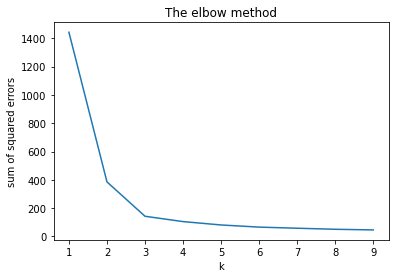

In [58]:
plt.plot(k_range,sse)
plt.title('The elbow method')
plt.xlabel('k')
plt.ylabel('sum of squared errors')

# the k=3 according to the elbow method

In [63]:
km=KMeans(n_clusters=3)
km.fit(data)
km.cluster_centers_

array([[ 6.85384615e+00,  3.07692308e+00,  5.71538462e+00,
         2.05384615e+00,  2.34645113e+00,  2.72354548e-01,
        -8.88178420e-16],
       [ 5.88360656e+00,  2.74098361e+00,  4.38852459e+00,
         1.43442623e+00,  6.64433508e-01, -3.30292213e-01,
         2.00000000e+00],
       [ 5.00600000e+00,  3.41800000e+00,  1.46400000e+00,
         2.44000000e-01, -2.64084076e+00,  1.90519953e-01,
         1.00000000e+00]])

# visualise the predicted data

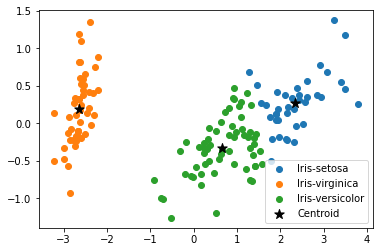

In [70]:
species=['Iris-setosa','Iris-virginica','Iris-versicolor','Centroid']
plt.scatter(data['PCA 1'].where(data.cluster==0), data['PCA 2'].where(data.cluster==0))
plt.scatter(data['PCA 1'].where(data.cluster==1), data['PCA 2'].where(data.cluster==1))
plt.scatter(data['PCA 1'].where(data.cluster==2), data['PCA 2'].where(data.cluster==2))
centroid=plt.scatter(km.cluster_centers_[:,4], km.cluster_centers_[:,5],color='black',s=100,marker='*',label='centroid')
plt.legend(species,loc='best')